In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

In [2]:
!pip install geocoder

In [3]:
!pip install folium 

In [4]:
toronto = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [5]:
tpostal = toronto[0]

In [6]:
tpostal.columns

Index(['Postal Code', 'Borough', 'Neighborhood'], dtype='object')

In [7]:
tpostal = tpostal[tpostal['Borough'] != 'Not assigned']
tpostal.shape

(103, 3)

In [8]:
tpostal.reset_index(drop=True)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [9]:
!wget https://twk.com.mx/Geospatial_Coordinates.csv

--2020-07-12 00:24:11--  https://twk.com.mx/Geospatial_Coordinates.csv
Resolving twk.com.mx (twk.com.mx)... 161.35.230.8
Connecting to twk.com.mx (twk.com.mx)|161.35.230.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2891 (2.8K) [text/csv]
Saving to: ‘Geospatial_Coordinates.csv.2’

100%[======================================>] 2,891       --.-K/s   in 0s      

2020-07-12 00:24:12 (217 MB/s) - ‘Geospatial_Coordinates.csv.2’ saved [2891/2891]



In [10]:
cords = pd.read_csv('Geospatial_Coordinates.csv')

In [11]:
cords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
final_bors = pd.merge(left=tpostal, right=cords, left_on='Postal Code', right_on='Postal Code')

In [13]:
final_bors

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [14]:
import folium
from geopy.geocoders import Nominatim

In [15]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ontario_go")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
(latitude, longitude)

(43.6534817, -79.3839347)

In [16]:
toronto = folium.Map(width=960, height=480, location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_bors['Latitude'], final_bors['Longitude'], final_bors['Borough'], final_bors['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto)  
    
toronto

In [17]:
downtown = final_bors[(final_bors['Borough'].str.contains('Central')) | (final_bors['Borough'].str.contains('Downtown'))]

In [18]:
downtown.shape

(28, 5)

In [19]:
downtown_map = folium.Map(width=960, height=480, location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(downtown['Latitude'], downtown['Longitude'], downtown['Borough'], downtown['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(downtown_map)
downtown_map

<p></p>
<p></p>

## Foursquare API for explore the Neighborghoods

My first thought was to explore just Central and Downtown Toronto to concentrate my efforts in the central parts of the city, but then trying to not extend too much my search.
<p></p>

In [20]:
import requests

CLIENT_ID = 'G1WYTHPBHM5CGJOU3TDHBMSMSK3J3X3QHLI00OA4Z325DAF5' #Foursquare ID
CLIENT_SECRET = 'QB55AIJ1HBM3XYSTAFEMWUTS5RL3MQG4NYBJYUOJ12E3HCP3' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
toronto_venues = getNearbyVenues(names=downtown['Postal Code'], latitudes=downtown['Latitude'],longitudes=downtown['Longitude'])

M5A
M7A
M5B
M5C
M5E
M5G
M6G
M5H
M5J
M5K
M5L
M4N
M5N
M4P
M5P
M4R
M5R
M4S
M5S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y


<p></p>
The most common result it returned was 'Coffee Shop' and 'Café' followed by all kinds of restaurants in the area.
<p></p>

In [23]:
toronto_venues['Venue Category'].value_counts()

Coffee Shop                      136
Café                              73
Restaurant                        45
Hotel                             43
Japanese Restaurant               33
Italian Restaurant                28
Park                              27
Bakery                            22
Gym                               22
Sandwich Place                    22
Seafood Restaurant                22
Pizza Place                       21
Sushi Restaurant                  20
Beer Bar                          18
American Restaurant               18
Clothing Store                    18
Thai Restaurant                   16
Pub                               16
Bar                               14
Deli / Bodega                     14
Vegetarian / Vegan Restaurant     14
Steakhouse                        13
Gastropub                         13
Diner                             13
Bookstore                         12
Theater                           12
Salad Place                       12
B

In [24]:
vensize = toronto_venues['Venue Category'].unique()
print('Unique venues in Toronto Central and Downtown are', len(vensize))

Unique venues in Toronto Central and Downtown are 214


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
M4N,4,4,4,4,4,4
M4P,9,9,9,9,9,9
M4R,22,22,22,22,22,22
M4S,33,33,33,33,33,33
M4T,4,4,4,4,4,4
M4V,16,16,16,16,16,16
M4W,4,4,4,4,4,4
M4X,44,44,44,44,44,44
M4Y,71,71,71,71,71,71


## Hot coding the results

In [26]:
toronto_hot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_hot['Neighborhood'] = toronto_venues['Neighborhood'] 
fixed_columns = [toronto_hot.columns[-1]] + list(toronto_hot.columns[:-1])
toronto_hot = toronto_hot[fixed_columns]

toronto_hot.shape

(1342, 214)

In [27]:
toronto_hot.columns

Index(['Yoga Studio', 'Airport', 'Airport Food Court', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'American Restaurant',
       'Antique Shop', 'Aquarium', 'Art Gallery',
       ...
       'Theme Restaurant', 'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop', 'Women's Store'],
      dtype='object', length=214)

In [28]:
toronto_gp = toronto_hot.groupby('Neighborhood').mean().reset_index()
toronto_gp

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,M4N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,M4R,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.045455,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.030303,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,M4T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M4V,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000
6,M4W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,M4X,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,M4Y,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.00,...,0.014085,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M5A,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000


<p></p>

# Top 5 venues p/Postal Code

<p></p>

In [29]:
num_top_venues = 5

for hood in toronto_gp['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_gp[toronto_gp['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4N----
         venue  freq
0         Park  0.50
1  Swim School  0.25
2     Bus Line  0.25
3  Yoga Studio  0.00
4       Museum  0.00


----M4P----
                  venue  freq
0                 Hotel  0.22
1           Pizza Place  0.11
2        Breakfast Spot  0.11
3  Gym / Fitness Center  0.11
4                  Park  0.11


----M4R----
                 venue  freq
0       Clothing Store  0.14
1          Coffee Shop  0.09
2  Sporting Goods Shop  0.09
3   Mexican Restaurant  0.05
4                 Park  0.05


----M4S----
                venue  freq
0      Sandwich Place  0.09
1        Dessert Shop  0.09
2         Coffee Shop  0.06
3                Café  0.06
4  Italian Restaurant  0.06


----M4T----
         venue  freq
0         Park  0.25
1       Lawyer  0.25
2        Trail  0.25
3   Restaurant  0.25
4  Yoga Studio  0.00


----M4V----
                 venue  freq
0                  Pub  0.12
1          Coffee Shop  0.12
2         Liquor Store  0.06
3  Fried Chicken Joint  0.06

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_gp['Neighborhood']

for ind in np.arange(toronto_gp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_gp.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,Park,Swim School,Bus Line,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
1,M4P,Hotel,Gym / Fitness Center,Breakfast Spot,Food & Drink Shop,Sandwich Place,Department Store,Park,Pizza Place,Convenience Store,Convention Center
2,M4R,Clothing Store,Sporting Goods Shop,Coffee Shop,Yoga Studio,Gym / Fitness Center,Fast Food Restaurant,Diner,Mexican Restaurant,Pet Store,Chinese Restaurant
3,M4S,Sandwich Place,Dessert Shop,Coffee Shop,Café,Italian Restaurant,Pizza Place,Sushi Restaurant,Gym,Pharmacy,Farmers Market
4,M4T,Park,Trail,Lawyer,Restaurant,Comfort Food Restaurant,Comic Shop,Electronics Store,College Rec Center,Eastern European Restaurant,Donut Shop


# Clustering
<p></p>
<p></p>

In [32]:
!pip install yellowbrick

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### First thing was to see the best possible number of clusters with an elbow method

/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


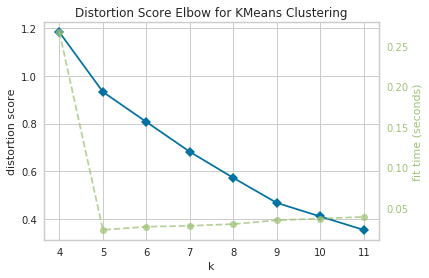

In [34]:
toronto_cluster = toronto_gp.drop('Neighborhood', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(toronto_cluster)
visualizer.show() 

### '5' seems the best approach
<p></p>

In [35]:
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_cluster)
kmeans.labels_[0:10] 

array([4, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [36]:
toronto_cluster.head()

,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.045455,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030303,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_final = downtown

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_final = toronto_final.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Postal Code')

toronto_final.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Dessert Shop,Shoe Store,Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Sandwich Place,Burrito Place,Café,Smoothie Shop,Beer Bar,Mexican Restaurant,Italian Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Bubble Tea Shop,Hotel,Cosmetics Shop,Lingerie Store,Electronics Store,Fast Food Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Café,Coffee Shop,Cosmetics Shop,American Restaurant,Cocktail Bar,Gym,Gastropub,Hotel,Beer Bar
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Beer Bar,Restaurant,Seafood Restaurant,Bakery,Farmers Market,Pharmacy,Cheese Shop,Café


In [38]:
map_clusters = folium.Map(width=960, height=480, location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<p></p>
<p></p>

### Showing the actual results from the different clusters

<p></p>
<p></p>

In [40]:
toronto_final[toronto_final['Cluster Labels'] == 0]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Dessert Shop,Shoe Store,Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Sandwich Place,Burrito Place,Café,Smoothie Shop,Beer Bar,Mexican Restaurant,Italian Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Bubble Tea Shop,Hotel,Cosmetics Shop,Lingerie Store,Electronics Store,Fast Food Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Café,Coffee Shop,Cosmetics Shop,American Restaurant,Cocktail Bar,Gym,Gastropub,Hotel,Beer Bar
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Beer Bar,Restaurant,Seafood Restaurant,Bakery,Farmers Market,Pharmacy,Cheese Shop,Café
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Salad Place,Bubble Tea Shop,Thai Restaurant,Burger Joint
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Candy Store,Coffee Shop,Diner,Nightclub,Italian Restaurant,Baby Store,Restaurant
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Hotel,Restaurant,Gym,Clothing Store,Deli / Bodega,Thai Restaurant,Concert Hall,Cosmetics Shop
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Restaurant,Fried Chicken Joint,Brewery,Sporting Goods Shop,History Museum
42,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Coffee Shop,Hotel,Café,Seafood Restaurant,Japanese Restaurant,Restaurant,Italian Restaurant,American Restaurant,Salad Place,Concert Hall


In [41]:
toronto_final[toronto_final['Cluster Labels'] == 1]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Park,Trail,Lawyer,Restaurant,Comfort Food Restaurant,Comic Shop,Electronics Store,College Rec Center,Eastern European Restaurant,Donut Shop
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [42]:
toronto_final[toronto_final['Cluster Labels'] == 2]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,2,Mexican Restaurant,Trail,Sushi Restaurant,Jewelry Store,Women's Store,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [43]:
toronto_final[toronto_final['Cluster Labels'] == 3]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,M5N,Central Toronto,Roselawn,43.711695,-79.416936,3,Home Service,Garden,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [44]:
toronto_final[toronto_final['Cluster Labels'] == 4]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,M4N,Central Toronto,Lawrence Park,43.72802,-79.38879,4,Park,Swim School,Bus Line,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
